In [71]:
# importing prepared data
import pandas as pd

df = pd.read_csv('../Data/cleaned_merged_data.csv')

# cleaning the dates
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date']).dt.date


# Exploratory Data Analysis

# 1. What are the Monthly Order Trends?

In [27]:
df['month_ordered'] = df['order_purchase_timestamp'].dt.month_name()

In [38]:
orders_by_month = df.pivot_table(index='month_ordered', values='order_id', aggfunc='count').reset_index()
orders_by_month = orders_by_month.rename(columns={'order_id': 'number_of_orders'})


In [39]:
orders_by_month

,month_ordered,number_of_orders
0,April,10956
1,August,12513
2,December,6415
3,February,9800
4,January,9316
5,July,12038
6,June,11082
7,March,11520
8,May,12458
9,November,8883


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

orders_by_month['month_ordered'] = pd.Categorical(orders_by_month['month_ordered'], categories=month_order, ordered=True)
orders_by_month = orders_by_month.sort_values('month_ordered')



In [108]:
sns.set_style("dark") 
plt.rcParams['axes.facecolor'] = 'black'      
plt.rcParams['figure.facecolor'] = 'black'    
plt.rcParams['axes.edgecolor'] = 'white'     
plt.rcParams['xtick.color'] = 'white'        
plt.rcParams['ytick.color'] = 'white'         
plt.rcParams['text.color'] = 'white'          
plt.rcParams['axes.labelcolor'] = 'white'  

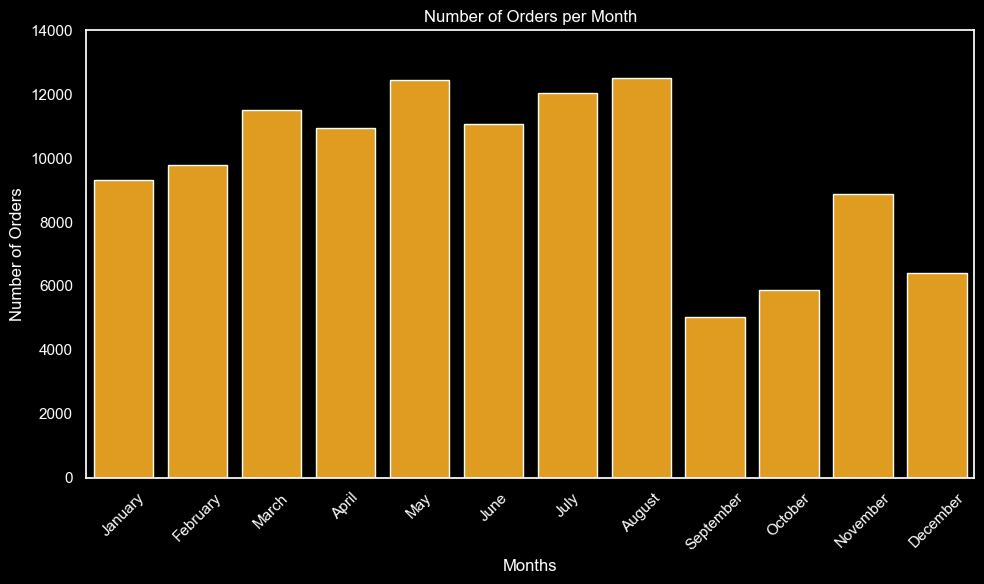

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(data=orders_by_month, x='month_ordered', y='number_of_orders', color='Orange')

legend = plt.gca().get_legend()
if legend:
    legend.remove()

sns.set_theme(style='ticks')
plt.title('Number of Orders per Month')
plt.xlabel('Months')
plt.ylim(0, 14000)
plt.ylabel('Number of Orders')
plt.xticks(rotation=45) 
plt.tight_layout()       

plt.show()

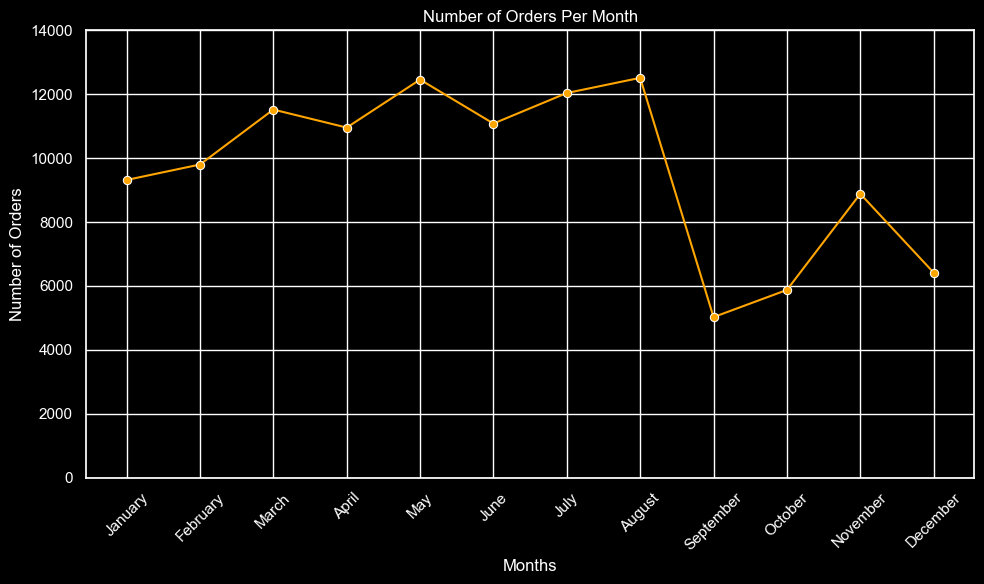

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=orders_by_month, x='month_ordered', y='number_of_orders', marker='o', color='orange')

plt.title('Number of Orders Per Month')
plt.xlabel('Months')
plt.ylim(0, 14000)
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Number of Orders per product category



In [84]:
orders_by_category = df.pivot_table(index='product_category_name_english', values='order_id', aggfunc='count').reset_index()
orders_by_category = orders_by_category.rename(columns={'order_id': 'number_of_orders', 'product_category_name_english': 'product_category'})
orders_by_category.sort_values('number_of_orders', ascending=False, inplace=True)

# 20 Best Selling Product Categories

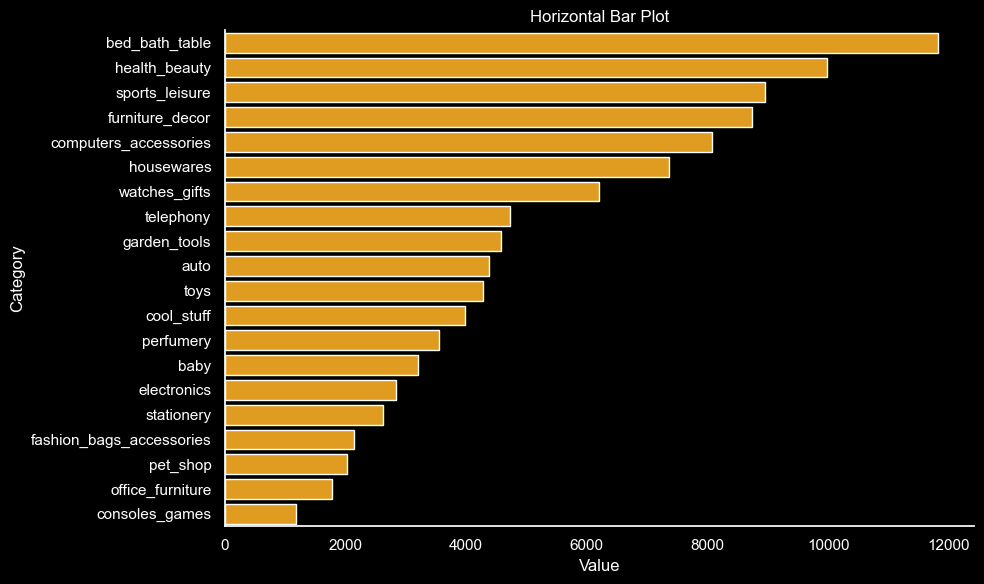

In [92]:
Top_20 = orders_by_category.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=Top_20, x='number_of_orders', y='product_category', color='orange')  

# Customize
plt.title('Horizontal Bar Plot')
sns.despine()
plt.xlabel('Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 3. Average Order Value in each category?

In [102]:
category_aov = df.groupby('product_category_name_english').agg({
    'price': 'sum',          
    'order_id': 'nunique'     
}).reset_index()

category_aov['avg_order_value'] = category_aov['price'] / category_aov['order_id']
category_aov = category_aov.rename(columns={'order_id': 'number_of_orders', 'product_category_name_english': 'product_category', 'price': 'total_category_revenue'})
category_aov.sort_values('avg_order_value', inplace=True, ascending=False)
category_aov

,product_category,total_category_revenue,number_of_orders,avg_order_value
14,computers,242811.61,181,1341.500608
64,small_appliances_home_oven_and_coffee,48945.71,75,652.609467
45,home_appliances_2,123265.31,234,526.774829
0,agro_industry_and_commerce,83841.95,182,460.670055
56,musical_instruments,210928.73,628,335.873774
...,...,...,...,...
26,electronics,166779.21,2550,65.403612
11,cds_dvds_musicals,730.00,12,60.833333
23,diapers_and_hygiene,1567.59,27,58.058889
35,flowers,1110.04,29,38.277241


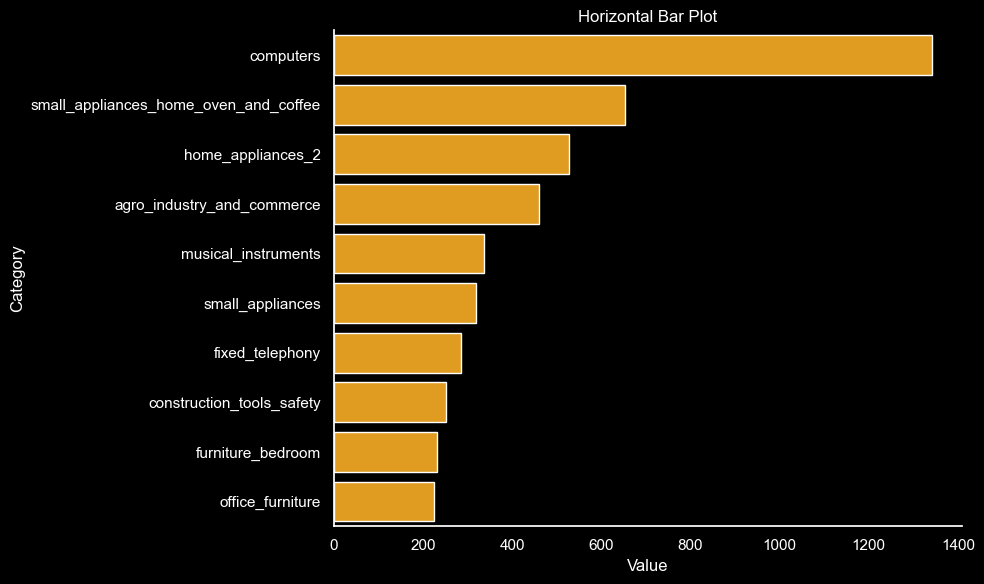

In [109]:
Top_10_Categories_by_aov = category_aov.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=Top_10_Categories_by_aov, x='avg_order_value', y='product_category', color='orange')  

# Customize
plt.title('Horizontal Bar Plot')
sns.despine()
plt.xlabel('Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 4. Which categories generate the most revenue?


In [110]:
category_revenue = category_aov.copy()

category_revenue.sort_values('total_category_revenue', inplace=True, ascending=False)
category_revenue

,product_category,total_category_revenue,number_of_orders,avg_order_value
43,health_beauty,1297355.80,8835,146.842762
70,watches_gifts,1253143.30,5624,222.820644
7,bed_bath_table,1092551.02,9417,116.019010
65,sports_leisure,1023996.34,7720,132.642013
15,computers_accessories,942277.57,6689,140.869722
...,...,...,...,...
35,flowers,1110.04,29,38.277241
46,home_comfort_2,773.17,24,32.215417
11,cds_dvds_musicals,730.00,12,60.833333
29,fashion_childrens_clothes,569.85,8,71.231250


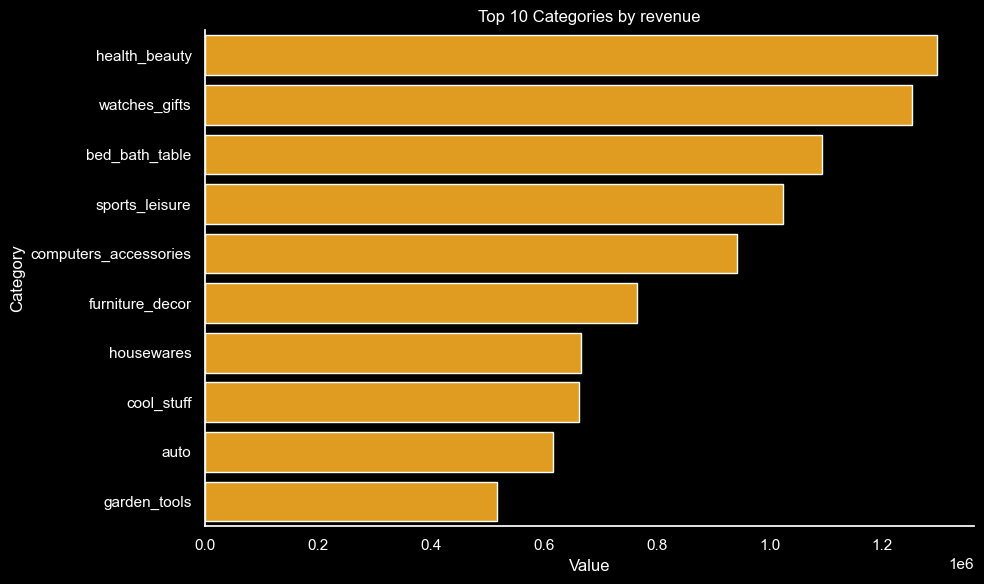

In [111]:
Top_10_Categories_by_revenue = category_revenue.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=Top_10_Categories_by_revenue, x='total_category_revenue', y='product_category', color='orange')  

# Customize
plt.title('Top 10 Categories by revenue')
sns.despine()
plt.xlabel('Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 5. Avg Delivery Time per State

In [ ]:
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
state_delivery = df.groupby('customer_state').agg({
    'delivery_time': 'mean',
    'order_id': 'nunique'
}).reset_index()
state_delivery = state_delivery.sort_values(by='delivery_time', ascending=False)
state_delivery = state_delivery.rename(columns={'order_id': 'number_of_orders'})



Correlation between delivery time and number of orders: -0.583


,customer_state,delivery_time,number_of_orders
21,RR,27.863636,44
3,AP,27.662651,68
2,AM,26.053892,146
1,AL,24.084668,407
13,PA,23.268224,951
9,MA,21.297899,730
24,SE,20.919271,343
5,CE,20.266352,1312
14,PB,20.203583,523
0,AC,20.152174,79


Index(['id', 'name', 'sigla', 'regiao_id', 'codigo_ibg', 'cartodb_id',
       'created_at', 'updated_at', 'geometry'],
      dtype='object')


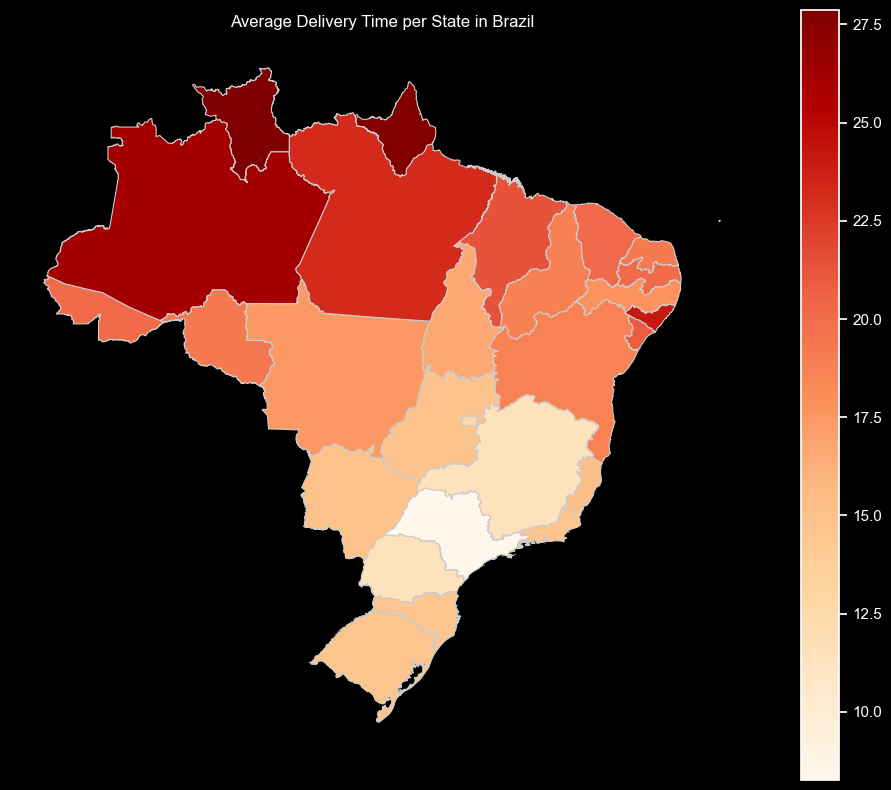

In [145]:
import geopandas as gpd

brazil_states = gpd.read_file('../Data/brazil-states.geojson')  # or .shp file

# Preview the column with state abbreviations (e.g., 'sigla' or 'uf')
print(brazil_states.columns)
merged_geo = brazil_states.merge(state_delivery, left_on='sigla', right_on='customer_state')


fig, ax = plt.subplots(figsize=(12, 10))
merged_geo.plot(column='delivery_time',
                cmap='OrRd',
                linewidth=0.8,
                edgecolor='0.8',
                legend=True,
                ax=ax)

plt.title('Average Delivery Time per State in Brazil')
plt.axis('off')
plt.show()

# Correlation Between Number of orders & Delivery Time per State

Correlation between delivery time and number of orders: -0.583


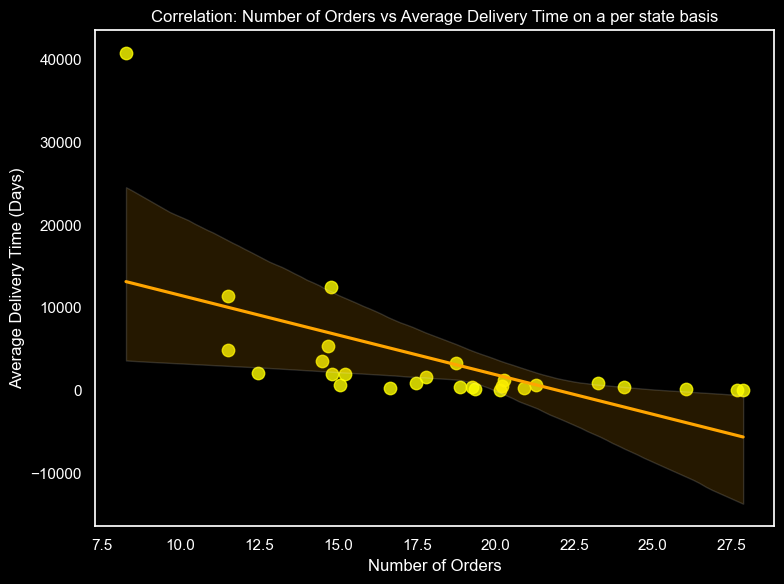

In [139]:
correlation = state_delivery['delivery_time'].corr(state_delivery['number_of_orders'])
print(f'Correlation between delivery time and number of orders: {correlation:.3f}')

plt.figure(figsize=(8, 6))
sns.regplot(data=state_delivery, x='delivery_time', y='number_of_orders', marker='o', scatter_kws={'s': 80, 'color': 'yellow'}, line_kws={"color": "orange"})
plt.title('Correlation: Number of Orders vs Average Delivery Time on a per state basis')
plt.xlabel('Number of Orders')

plt.ylabel('Average Delivery Time (Days)')
plt.tight_layout()
plt.show()

# 6. Top 3 States (as per order order volume) and it's Top 5 Product Cateogry

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,payment_installments,payment_value,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name_english
0,a41753c6a1d8accb89732e36243432d7,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05,dc83fe8f72fb4388f079a2f9b586240c,itaquaquecetuba,...,3.0,45.69,e3e020af31d4d89d2602272b315c3f6e,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,viamao,RS,health_beauty
1,6a1594b5f5cfc5bac6dcdc3f48f22b5e,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12,ba0a84d4272f023846c748fd2eb76ffd,rio de janeiro,...,6.0,123.12,c5d8079278e912d7e3b6beb48ecb56e8,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,cuiaba,MT,health_beauty
2,f6fbf7907913892ffc12ada3bff286ba,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,montes claros,...,4.0,128.08,c5d8079278e912d7e3b6beb48ecb56e8,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,cuiaba,MT,health_beauty
3,a63144d37a00c28ef382668a5d5ece8b,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16,8ad15fb1cf056731335e36eb723c0eac,santa rosa,...,2.0,46.01,36555a2f528d7b2a255c504191445d39,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,lencois paulista,SP,health_beauty
4,3ea7135b7064169abacfc10aa72f2e3a,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12,463b274f7ab4cac3b894531a03a7afa1,santa maria,...,4.0,84.54,e586ebb6022265ae1eea38f46ffe3ead,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,londrina,PR,health_beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115873,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-10 20:52:05,2017-10-16 21:59:33,2017-11-08,f979a07fc18b2af3780a796ba14b96f4,sao paulo,...,1.0,54.09,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2017-10-16 01:17:50,39.99,14.10,porto alegre,RS,fashion_childrens_clothes
115874,b99217b1fcf2fdeace7b8d869b76cb91,8325d6e7af2f2bfb58cf040729b232dd,delivered,2018-03-07 17:42:06,2018-03-07 17:55:36,2018-03-08 20:09:40,2018-03-15 22:04:49,2018-04-02,a1d53377ab83871b0ad483b03ac69d6c,sao paulo,...,3.0,110.44,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,porto alegre,RS,fashion_childrens_clothes
115875,bc3ac768a8963f4ca68942ea6558fc9f,7968f8e8d5429c6a0611671f5a52ed2b,delivered,2018-03-21 09:40:36,2018-03-22 03:09:01,2018-03-22 21:54:58,2018-03-27 20:14:40,2018-04-10,cd52ca09554e5cc34d9ec28d230008af,blumenau,...,1.0,106.43,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-28 03:09:01,39.99,6.43,porto alegre,RS,fashion_childrens_clothes
115876,bede3503afed051733eeb4a84d1adcc5,919570a26efbd068d6a0f66d5c5072a3,delivered,2017-09-17 16:51:43,2017-09-19 04:05:52,2017-09-19 20:22:49,2017-09-28 18:14:35,2017-10-11,141e824b8e0df709e3fcf6d982225a8e,brasilia,...,1.0,115.45,8db75af9aed3315374db44d7860e25da,4e922959ae960d389249c378d1c939f5,2017-09-26 04:05:52,100.00,15.45,jacarei,SP,security_and_services
